In [2]:
#keras의 fit mothod는 history 클래스 객체를 반환홤.. 
#history 객체에는 훈련 과정에서 계산한 지표, 손실과 정확도 값이 저장되어있음

In [3]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()
    
print(train_input.shape, train_target.shape)

2025-11-21 15:29:57.780996: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-21 15:29:57.796837: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-21 15:29:58.311154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-21 15:30:00.898922: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28) (60000,)


In [4]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state =42
)
#print(train_sclaed.shape)
#print(train_target.shape)

In [10]:
import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size = 0.2, random_state =42
)

print(train_scaled.shape, train_target.shape)

(48000, 28, 28) (48000,)


In [11]:
def model_fn(a_layer =None):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape =(28, 28)))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation= 'relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [12]:
model = model_fn()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 5, verbose =0)  
#이미지 파일 개수는 6000개인데, 정답 데이터 y는 48000개 오류남
#확인 후 수정+

In [14]:
print(history.history.keys())
#loss: 손실(훈련세트), accuracy: 정확도(훈련세트)
##훈련 측정값을 가지고 있음

dict_keys(['accuracy', 'loss'])


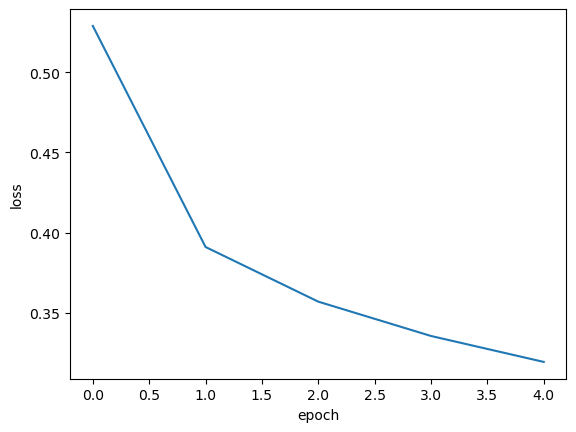

In [15]:
#케라스는 에포크마다 손실을 계산함..

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

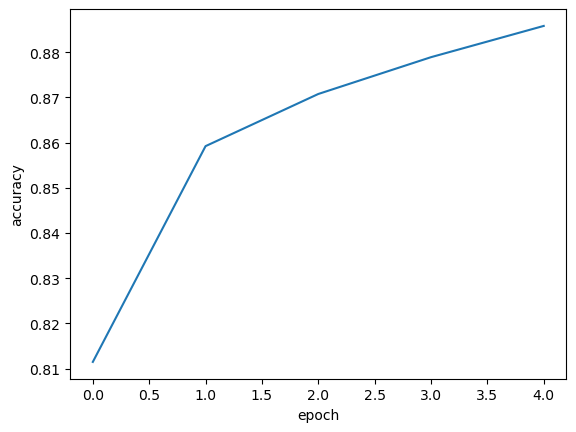

In [16]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [17]:
#에포크 횟수 늘려서 모델 다시 훈련

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose =1)   
#verbose,, 훈련과정 상세 얼마나 보여줄지(1:기본값, epoch마다 loss, accuracy 출력 / 2: 마지막에 한 줄 요약 / 0:출력 없음)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8134 - loss: 0.5300
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8602 - loss: 0.3915
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8724 - loss: 0.3545
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8796 - loss: 0.3334
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8857 - loss: 0.3174
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8907 - loss: 0.3050
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8953 - loss: 0.2949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8990 - loss: 0.2868
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9000 - loss: 0.2795
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9039 - loss: 0.2739
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9064 - loss: 0.2666
Epoch 12/20
1500/1500 ━━━━━━━━

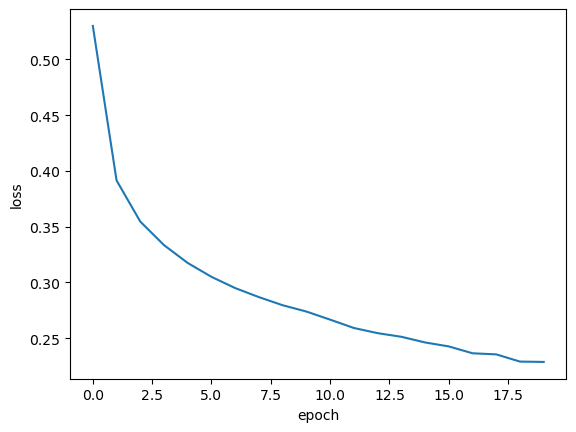

In [18]:
plt.plot(history.history['loss'])
plt.xlabel('epoch') 
plt.ylabel('loss')
plt.show()

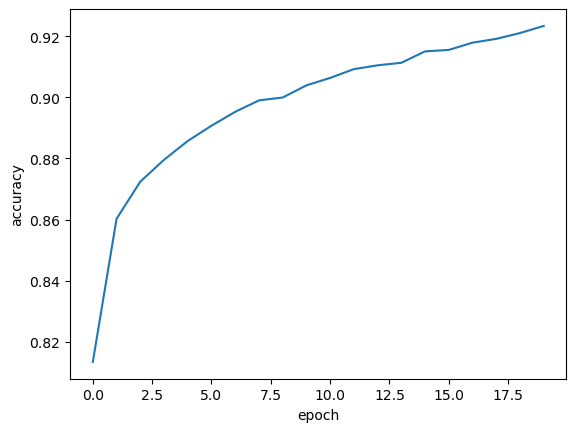

In [19]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [20]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                     validation_data = (val_scaled, val_target))      #훈련과 동시에 val data로 테스트까지 수행함

In [21]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


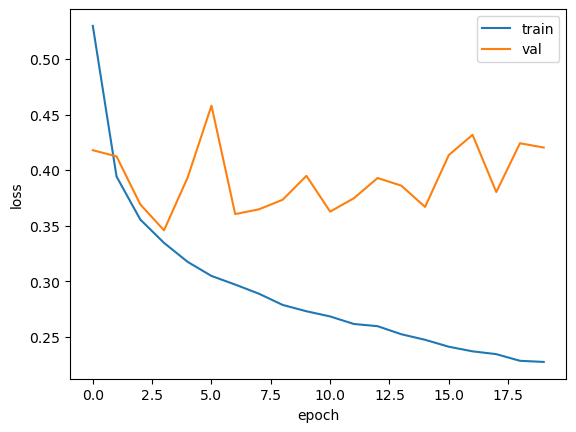

In [22]:
plt.plot(history.history['loss'], label ='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()   #각 그래프의 라벨 보여줌
plt.show()

#에포크가 커질수록 손실이 늘어난다? 과대적합이 발생한다는 신호
#검증데이터의 손실이 높아지는 것은 외운 문제집과 유형이 다른 문제를 받아 점점 성적이 떨어지는 것과 같음
#과대적합이 심화되는 시점에서 훈련을 멈추는 것이 일반적인 해결책

In [23]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2,
                    validation_data = (val_scaled, val_target))

#옵티마이저의 하이퍼파라미터 조정하여 과대적합 해소
#adam은 학습속도를 조절하는 기능을 가짐. 훈련 진행될수록 학습속도를 점차 줄임(어떻게? 초기에 빠르게 학습하고후기에는 보폭을 줄여 잡음을 외우려는 경향을 완화시킴)

Epoch 1/20
1500/1500 - 4s - 2ms/step - accuracy: 0.8173 - loss: 0.5256 - val_accuracy: 0.8381 - val_loss: 0.4459
Epoch 2/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8604 - loss: 0.3922 - val_accuracy: 0.8643 - val_loss: 0.3901
Epoch 3/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8725 - loss: 0.3504 - val_accuracy: 0.8635 - val_loss: 0.3803
Epoch 4/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8808 - loss: 0.3244 - val_accuracy: 0.8742 - val_loss: 0.3477
Epoch 5/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8868 - loss: 0.3075 - val_accuracy: 0.8711 - val_loss: 0.3608
Epoch 6/20
1500/1500 - 2s - 2ms/step - accuracy: 0.8927 - loss: 0.2919 - val_accuracy: 0.8697 - val_loss: 0.3726
Epoch 7/20
1500/1500 - 3s - 2ms/step - accuracy: 0.8972 - loss: 0.2776 - val_accuracy: 0.8814 - val_loss: 0.3330
Epoch 8/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9021 - loss: 0.2664 - val_accuracy: 0.8815 - val_loss: 0.3294
Epoch 9/20
1500/1500 - 3s - 2ms/step - accuracy: 0.9041 - loss: 0.2569 - val_accuracy: 0.8812 - 

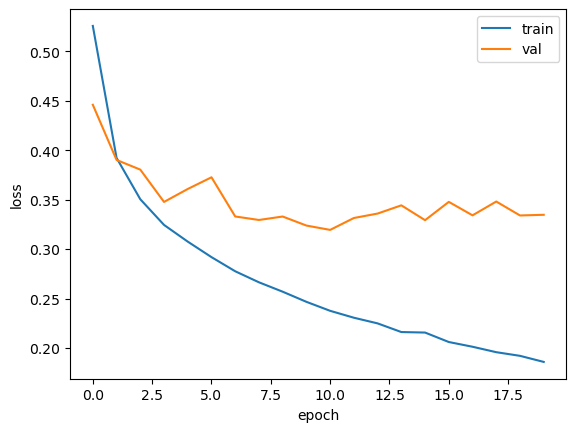

In [24]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()  #과대적합이 좀 완화된 그래프

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

#flatten: 28*28 784픽셀을 1차원으로 펴서 당음 층에 전달, 가중치 없음
#dense: 784픽셀을 입력받아 100개의 뉴런으로 연결된 은닉층(파라미터 개수 = 가중치 개수 + 편향 개수)
####param = (이전층 뉴런 수 * 현재층 뉴런수 = 가중치 개수) + (현재층 뉴런수 = 편향개수) = 784 *100 + 100
#dropout: 과대적합 방지를 위해 훈련시 30%의 뉴런을 무작위로 끊음. 가중치 없음   --> 뉴런을 끊는다는 것은 뉴런을 해당 뉴런을 비활성화 한다는 것이지 다음 층으로 전달을 안하는 것은 아님
#dense: 10개의 출력층

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7899 - loss: 0.5946 - val_accuracy: 0.8441 - val_loss: 0.4454
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8412 - loss: 0.4433 - val_accuracy: 0.8553 - val_loss: 0.4014
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8542 - loss: 0.4029 - val_accuracy: 0.8657 - val_loss: 0.3667
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8625 - loss: 0.3787 - val_accuracy: 0.8774 - val_loss: 0.3424
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8657 - loss: 0.3626 - val_accuracy: 0.8676 - val_loss: 0.3599
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8693 - loss: 0.3535 - val_accuracy: 0.8708 - val_loss: 0.3513
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.3464 - val_accuracy: 0.8779 - val_loss: 0.3354
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8761 - loss: 0.3334 - 

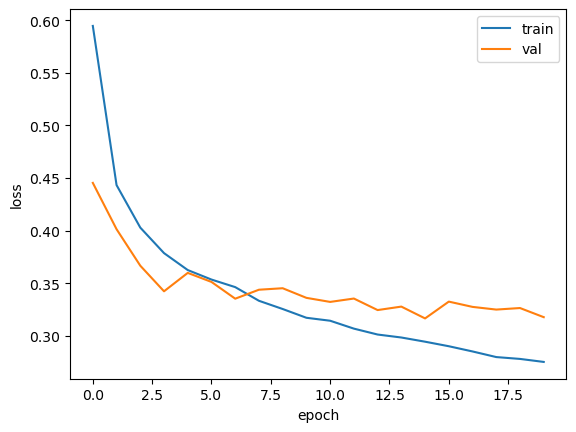

In [27]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label ='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8970 - loss: 0.2743 - val_accuracy: 0.8878 - val_loss: 0.3207
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8984 - loss: 0.2702 - val_accuracy: 0.8883 - val_loss: 0.3227
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.2667 - val_accuracy: 0.8897 - val_loss: 0.3253
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8992 - loss: 0.2643 - val_accuracy: 0.8864 - val_loss: 0.3307
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9013 - loss: 0.2633 - val_accuracy: 0.8879 - val_loss: 0.3292
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9019 - loss: 0.2603 - val_accuracy: 0.8903 - val_loss: 0.3253
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9026 - loss: 0.2567 - val_accuracy: 0.8873 - val_loss: 0.3183
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9008 - loss: 0.2579 - 

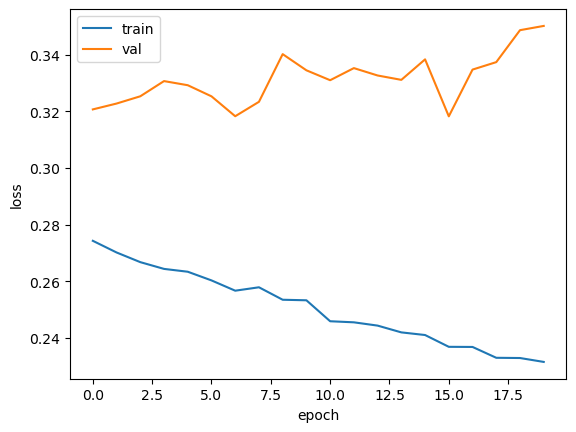

In [28]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label ='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [29]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9117 - loss: 0.2303 - val_accuracy: 0.8940 - val_loss: 0.3396
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9115 - loss: 0.2318 - val_accuracy: 0.8933 - val_loss: 0.3349
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9129 - loss: 0.2271 - val_accuracy: 0.8898 - val_loss: 0.3456
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9129 - loss: 0.2275 - val_accuracy: 0.8898 - val_loss: 0.3464
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9119 - loss: 0.2282 - val_accuracy: 0.8911 - val_loss: 0.3445
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9138 - loss: 0.2230 - val_accuracy: 0.8880 - val_loss: 0.3590
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9139 - loss: 0.2193 - val_accuracy: 0.8863 - val_loss: 0.3696
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9167 - loss: 0.2185 - 

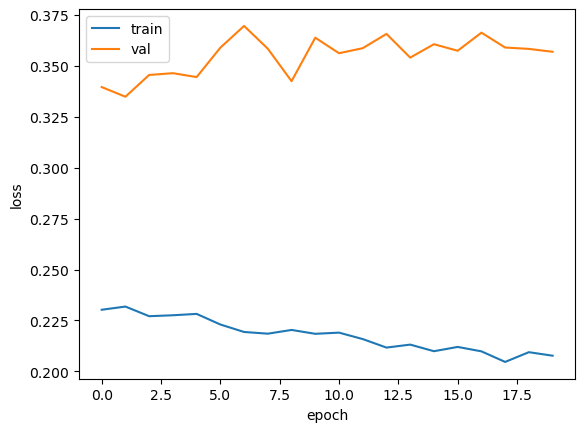

In [30]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label ='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9191 - loss: 0.2055 - val_accuracy: 0.8903 - val_loss: 0.3729
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9206 - loss: 0.2031 - val_accuracy: 0.8921 - val_loss: 0.3681
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9210 - loss: 0.2056 - val_accuracy: 0.8908 - val_loss: 0.3721
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9211 - loss: 0.2022 - val_accuracy: 0.8893 - val_loss: 0.3705
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9227 - loss: 0.2014 - val_accuracy: 0.8906 - val_loss: 0.3684
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9220 - loss: 0.2018 - val_accuracy: 0.8861 - val_loss: 0.3881
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9226 - loss: 0.2015 - val_accuracy: 0.8917 - val_loss: 0.3703
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9224 - loss: 0.1993 - 

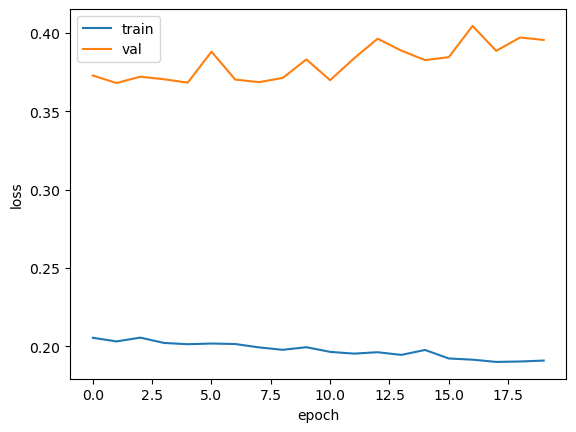

In [31]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label ='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9276 - loss: 0.1907 - val_accuracy: 0.8902 - val_loss: 0.3936
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9257 - loss: 0.1902 - val_accuracy: 0.8882 - val_loss: 0.3947
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9271 - loss: 0.1877 - val_accuracy: 0.8923 - val_loss: 0.4171
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9274 - loss: 0.1878 - val_accuracy: 0.8913 - val_loss: 0.3881
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9276 - loss: 0.1860 - val_accuracy: 0.8916 - val_loss: 0.4044
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9265 - loss: 0.1860 - val_accuracy: 0.8872 - val_loss: 0.4024
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9269 - loss: 0.1870 - val_accuracy: 0.8862 - val_loss: 0.4236
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9283 - loss: 0.1854 - 

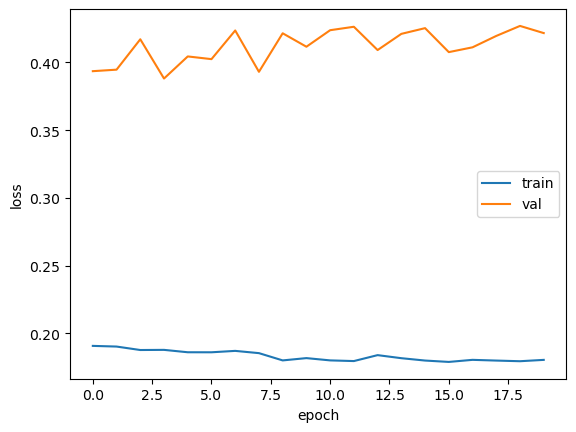

In [32]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label ='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [33]:
#실행시마다 결과가 다른 이유는, 데이터가 fit에서 분리될 때 각자 다른 난수를 통해 분류되고 가중치도 랜덤으로 설정되기때문임
#모델을 실행할때마다 결과가 달라지는데, 어떻게 내가 최적의 모델을 생성했다고 확신할 수 있을까?
# > 결과적으로 단 한번의 실행으로 가장 최적의 모델을 얻는 것은 불가능하며 딥러닝은 불학실성 속에서 가장 안정적인 모델을 찾는 과정임
# > 시드고정, 그러나 이 시드가 가장 최적의 시작점이라는 보장은 할 수 없음
# > 반복 훈련 및 편균 평가하기!! 시드를 고정하지 않거나 여러개의 다른 시드를 사용하여 같은 코드를 여러번 반복 시행
# > 그 중 가장 높은 적확도를 보인 보델을 선정하거나 각 모델 전체의 평균을 내어 모델 구조의 신뢰성을 평가
# > 즉 딥러닝에서는 무작위성을 제어하거나 반복 실험을 통해 신뢰성을 확보함
# > 그러나 이미 덮어씌워진 fit 내용은 어떻게 찾을 수 있나? ----> keras는 ModelCheckpoint라는 콜백 기능을 제공함
# > ModelCheckpoint는 훈련 과정 중 가장 성능이 좋았던 시점의 모델 가중치를 자동으로 파일로 저장해줌(이거 지정하지 않았던 것들은 콜백 불가능.,.)

In [34]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 11, verbose = 2,
                    validation_data = (val_scaled, val_target))

Epoch 1/11
1500/1500 - 4s - 2ms/step - accuracy: 0.7904 - loss: 0.5897 - val_accuracy: 0.8394 - val_loss: 0.4350
Epoch 2/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8408 - loss: 0.4405 - val_accuracy: 0.8553 - val_loss: 0.3970
Epoch 3/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8537 - loss: 0.4040 - val_accuracy: 0.8608 - val_loss: 0.3750
Epoch 4/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8620 - loss: 0.3776 - val_accuracy: 0.8732 - val_loss: 0.3502
Epoch 5/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8659 - loss: 0.3651 - val_accuracy: 0.8733 - val_loss: 0.3421
Epoch 6/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8703 - loss: 0.3518 - val_accuracy: 0.8737 - val_loss: 0.3421
Epoch 7/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8730 - loss: 0.3442 - val_accuracy: 0.8723 - val_loss: 0.3512
Epoch 8/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8761 - loss: 0.3335 - val_accuracy: 0.8829 - val_loss: 0.3239
Epoch 9/11
1500/1500 - 3s - 2ms/step - accuracy: 0.8763 - loss: 0.3294 - val_accuracy: 0.8788 - 

In [35]:
model.save('model-whole.keras')

In [36]:
model.save_weights('model.weights.h5')

In [37]:
!ls -al model*

-rwxrwxrwx 1 root root 979409 Nov 21 15:39 model-whole.keras
-rwxrwxrwx 1 root root 976600 Nov 21 15:39 model.weights.h5


In [ ]:
model = model_fn(keras.layers.Dropout(0.3))  #훈련하지 않은 새로운 모델 만들고 이전 저장했던 모델 파라미터 적재
model.load_weights('model.weights.h5')       #저장: save_weights(), 저장한 값 적재:load_weights()

In [39]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis = -1)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [40]:
print(np.mean(val_labels == val_target))

0.8835833333333334


In [42]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8836 - loss: 0.3247


[0.3246581554412842, 0.8835833072662354]

In [43]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only = True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [44]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8840 - loss: 0.3224


[0.3223942220211029, 0.8840000033378601]

In [45]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',
                                                save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [47]:
print(early_stopping_cb.stopped_epoch)

7


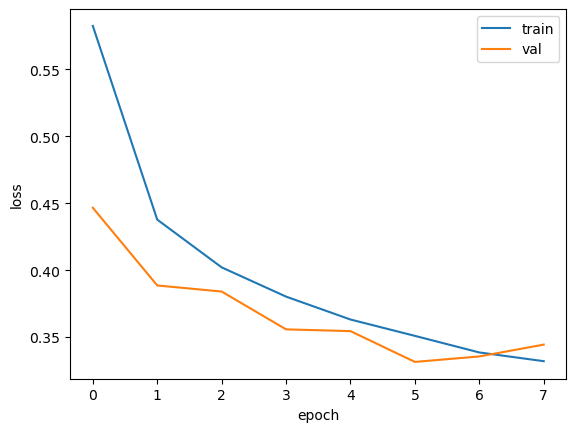

In [48]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8792 - loss: 0.3314


[0.331421822309494, 0.8791666626930237]